In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Features Engineering

In [2]:
# Признаки для машинного обучения
features = pd.read_pickle("./data/features.pkl")
features

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,1,8248.883228,LEO,CCSFS SLC 40,1.0,False,False,False,None,1.0,0.0,B0003,0
1,2,525.000000,LEO,CCSFS SLC 40,1.0,False,False,False,None,1.0,0.0,B0005,0
2,3,677.000000,ISS,CCSFS SLC 40,1.0,False,False,False,None,1.0,0.0,B0007,0
3,4,500.000000,PO,VAFB SLC 4E,1.0,False,False,False,None,1.0,0.0,B1003,0
4,5,3170.000000,GTO,CCSFS SLC 40,1.0,False,False,False,None,1.0,0.0,B1004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,13260.000000,VLEO,KSC LC 39A,2.0,True,True,True,5e9e3033383ecb075134e7cd,5.0,1.0,B1069,1
164,165,13260.000000,VLEO,VAFB SLC 4E,7.0,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,6.0,B1063,1
165,166,13260.000000,VLEO,CCSFS SLC 40,6.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5.0,B1067,1
166,167,13260.000000,VLEO,CCSFS SLC 40,4.0,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,0.0,B1072,1


In [3]:
# Применение One Hot кодирования номинальных переменных
pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']],
               prefix=('Orbit', 'LaunchSite', 'LandingPad', 'Serial'))

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Объединение числовых переменных и one hot переменных
features_one_hot = \
pd.concat((features[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount', 'GridFins', 'Reused', 'Legs', 'Class']],
           pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']],
                          prefix=('Orbit', 'LaunchSite', 'LandingPad', 'Serial'))),
          axis=1)
features_one_hot

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,GridFins,Reused,Legs,Class,Orbit_ES-L1,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1,8248.883228,1.0,1.0,0.0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1.0,1.0,0.0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1.0,1.0,0.0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1.0,1.0,0.0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1.0,1.0,0.0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,13260.000000,2.0,5.0,1.0,True,True,True,1,0,...,0,0,0,0,0,1,0,0,0,0
164,165,13260.000000,7.0,5.0,6.0,True,True,True,1,0,...,0,0,0,1,0,0,0,0,0,0
165,166,13260.000000,6.0,5.0,5.0,True,True,True,1,0,...,0,0,0,0,1,0,0,0,0,0
166,167,13260.000000,4.0,5.0,0.0,True,True,True,1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 92 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         168 non-null    int64  
 1   PayloadMass                          168 non-null    float64
 2   Flights                              168 non-null    float64
 3   Block                                168 non-null    float64
 4   ReusedCount                          168 non-null    float64
 5   GridFins                             168 non-null    object 
 6   Reused                               168 non-null    object 
 7   Legs                                 168 non-null    object 
 8   Class                                168 non-null    int32  
 9   Orbit_ES-L1                          168 non-null    uint8  
 10  Orbit_GEO                            168 non-null    uint8  
 11  Orbit_GTO                       

In [6]:
# Установление единого типа данных
features_one_hot = features_one_hot.astype('float64')

# Предсказание Машинного обучения

In [7]:
# Функция для отрисовки Матрицы Ошибок
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [8]:
# Отбор независимых переменных
X = features_one_hot.drop('Class', axis=1)
X

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,GridFins,Reused,Legs,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1.0,8248.883228,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164.0,13260.000000,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
164,165.0,13260.000000,7.0,5.0,6.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
165,166.0,13260.000000,6.0,5.0,5.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
166,167.0,13260.000000,4.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
X.shape

(168, 91)

In [10]:
# Отбор зависимой (целевой) переменной
Y = features_one_hot['Class'].to_numpy()
Y

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# Стандартизация переменных (Z-score)
transform = preprocessing.StandardScaler()
X.iloc[:, :5] = transform.fit_transform(X.iloc[:, :5])
X

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,GridFins,Reused,Legs,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,-1.721771,0.000000,-0.845330,-2.314161,-1.178357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.701151,-1.464136,-0.845330,-2.314161,-1.178357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.680531,-1.435323,-0.845330,-2.314161,-1.178357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.659911,-1.468875,-0.845330,-2.314161,-1.178357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.639291,-0.962751,-0.845330,-2.314161,-1.178357,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.639291,0.949905,-0.535928,0.581772,-0.964110,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
164,1.659911,0.949905,1.011081,0.581772,0.107123,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
165,1.680531,0.949905,0.701679,0.581772,-0.107123,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
166,1.701151,0.949905,0.082875,0.581772,-1.178357,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# Обучение модели Логистической регрессии с L1 регулеризацией, 
# для выявления важных переменных
log_reg_sep = LogisticRegression(penalty='l1', solver='liblinear')

log_reg_sep_cv = GridSearchCV(estimator=log_reg_sep,
                              param_grid={'C': np.logspace(-4,3,8)},
                              cv=5)
log_reg_sep_cv.fit(X=X, y=Y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [13]:
# Важные переменные
temp_v = np.sort(np.abs(log_reg_sep_cv.best_estimator_.coef_))[0][::-1]
temp_i = np.argsort(np.abs(log_reg_sep_cv.best_estimator_.coef_))[0][::-1]

important_columns = X.columns[temp_i[temp_v!=0]]
important_columns

Index(['Serial_B1050', 'Serial_B1006', 'ReusedCount', 'Serial_B1017',
       'Serial_B1036', 'LandingPad_5e9e3032383ecb267a34e7c7', 'Serial_B1028',
       'Flights', 'Serial_B1020', 'Serial_B1044',
       'LandingPad_5e9e3033383ecb075134e7cd',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B1007', 'Serial_B1059',
       'Serial_B1056', 'Serial_B1049', 'Legs', 'Orbit_ISS', 'Serial_B1018',
       'LaunchSite_KSC LC 39A', 'Serial_B1021',
       'LandingPad_5e9e3032383ecb6bb234e7ca', 'FlightNumber', 'GridFins',
       'Orbit_GTO', 'Serial_B1041', 'Serial_B1013', 'Serial_B1031',
       'Serial_B1029', 'Orbit_LEO', 'PayloadMass', 'Orbit_ES-L1',
       'Serial_B1060', 'Serial_B1042', 'Serial_B1032', 'Serial_B1039',
       'Serial_B1072', 'LandingPad_5e9e3032383ecb761634e7cb', 'Serial_B1047',
       'LaunchSite_CCSFS SLC 40', 'Serial_B1040', 'Reused'],
      dtype='object')

In [14]:
# Уменьшение колличества независимых переменных, ограничиваясь только перечнем important_columns
X = X[important_columns]
X

,Serial_B1050,Serial_B1006,ReusedCount,Serial_B1017,Serial_B1036,LandingPad_5e9e3032383ecb267a34e7c7,Serial_B1028,Flights,Serial_B1020,Serial_B1044,...,Serial_B1060,Serial_B1042,Serial_B1032,Serial_B1039,Serial_B1072,LandingPad_5e9e3032383ecb761634e7cb,Serial_B1047,LaunchSite_CCSFS SLC 40,Serial_B1040,Reused
0,0.0,0.0,-1.178357,0.0,0.0,0.0,0.0,-0.845330,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,-1.178357,0.0,0.0,0.0,0.0,-0.845330,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,-1.178357,0.0,0.0,0.0,0.0,-0.845330,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,-1.178357,0.0,0.0,0.0,0.0,-0.845330,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.178357,0.0,0.0,0.0,0.0,-0.845330,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,-0.964110,0.0,0.0,0.0,0.0,-0.535928,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
164,0.0,0.0,0.107123,0.0,0.0,0.0,0.0,1.011081,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
165,0.0,0.0,-0.107123,0.0,0.0,0.0,0.0,0.701679,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
166,0.0,0.0,-1.178357,0.0,0.0,0.0,0.0,0.082875,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [15]:
# Разделение данных на выборку для обучения и для теста
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
Y_test.shape

(34,)

Две нулевые гипотезы, с которыми будем сравнивать полученные в дальнейшем модели МО

In [16]:
# №1 Случайно предсказывать удачу с вероятностью 81,55%

In [17]:
percent_of_success = features["Class"].mean()
percent_of_success

0.8154761904761905

In [18]:
np.random.seed(1)
y_hat_rand = np.where(np.random.rand(*Y_test.shape)<percent_of_success, 1, 0)
y_hat_rand

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

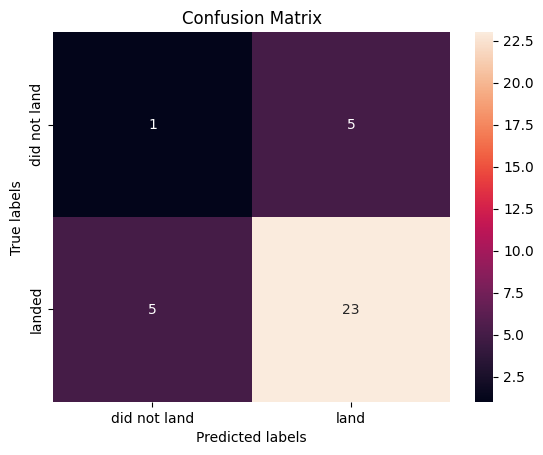

In [19]:
plot_confusion_matrix(Y_test, y_hat_rand)

In [20]:
# №2 Говорить что каждый запуск удачный

In [21]:
y_hat_ones = np.ones_like(Y_test)
y_hat_ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

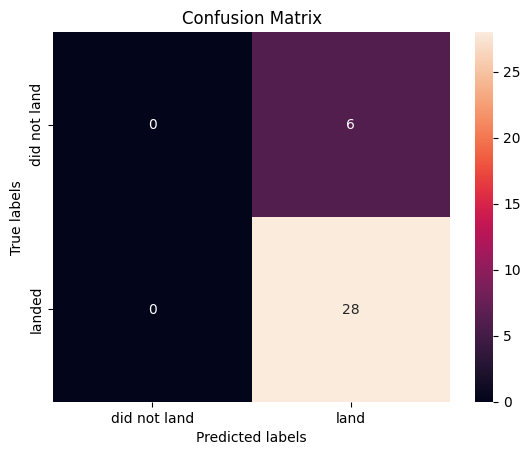

In [22]:
plot_confusion_matrix(Y_test, y_hat_ones)

Создадим и обучим 4 модели Машинного Обучения для решения задачи классификации

In [23]:
# Поиск наилучшей модели Логистической модели
parameters ={"C":np.logspace(-3, 1, 5)}
lr = LogisticRegression(max_iter=1000, penalty='l2', solver='lbfgs')

logreg_cv = GridSearchCV(lr, param_grid=parameters, scoring='f1', cv=10)
logreg_cv.fit(X=X_train, y=Y_train)

print("настроенные гиперпараметры :(best parameters) ", logreg_cv.best_params_)
print("F1-score (Y_train):",logreg_cv.best_score_)

настроенные гиперпараметры :(best parameters)  {'C': 1.0}
F1-score (Y_train): 0.9512422360248447


In [24]:
# Поиск наилучшей мождели Метода Опорных Векторов
parameters = {'C': np.logspace(-3, 3, 5)}
svm = SVC(kernel='linear')

svm_cv = GridSearchCV(svm, param_grid=parameters, scoring='f1', cv=10)
svm_cv.fit(X=X_train, y=Y_train)

print("настроенные гиперпараметры :(best parameters) ",svm_cv.best_params_)
print("F1-score (Y_train):",svm_cv.best_score_)

настроенные гиперпараметры :(best parameters)  {'C': 0.03162277660168379}
F1-score (Y_train): 0.9476708074534163


In [25]:
# Поиск наилучшего Решающего дерева
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, param_grid=parameters, scoring='f1', cv=10)
tree_cv.fit(X=X_train, y=Y_train)

print("настроенные гиперпараметры :(best parameters) ",tree_cv.best_params_)
print("F1-score (Y_train):",tree_cv.best_score_)

настроенные гиперпараметры :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
F1-score (Y_train): 0.9635177865612649


In [26]:
# Поиск наилучшей модели K ближайших соседей 
parameters = {'n_neighbors': range(1, 16),
              'weights': ['uniform', 'distance'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, param_grid=parameters, scoring='f1', cv=10)
knn_cv.fit(X=X_train, y=Y_train)

print("настроенные гиперпараметры :(best parameters) ",knn_cv.best_params_)
print("F1-score (Y_train):",knn_cv.best_score_)

настроенные гиперпараметры :(best parameters)  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
F1-score (Y_train): 0.9602898550724637


In [27]:
print(f'Успех c p= {percent_of_success:.2%}: {f1_score(y_pred=y_hat_rand, y_true=Y_test)}')
print(f'Успех c p= 100%: {f1_score(y_pred=y_hat_ones, y_true=Y_test)}')
print('='*50)
print(f'Логистическая регрессия: {logreg_cv.score(X=X_test, y=Y_test)}')
print(f'Метод опорных векторов: {svm_cv.score(X=X_test, y=Y_test)}')
print(f'Решающее дерево: {tree_cv.score(X=X_test, y=Y_test)}')
print(f'K ближайших соседей: {knn_cv.score(X=X_test, y=Y_test)}')

Успех c p= 81.55%: 0.8214285714285714
Успех c p= 100%: 0.9032258064516129
Логистическая регрессия: 0.9285714285714286
Метод опорных векторов: 0.9491525423728813
Решающее дерево: 0.9090909090909091
K ближайших соседей: 0.9285714285714286


Все Модели МО превосходят нулевую гипотезу №1 и №2  
  
В качестве итоговой модели возьмём Метод опорных векторов так как имеет наибольший F1_score

In [28]:
svm_cv.best_params_

{'C': 0.03162277660168379}

In [29]:
print("Уравнение разделяющей гиперплоскости:")
string = 'y = '
for i in range(X.shape[1]):
    string += f'({svm_cv.best_estimator_.coef_[0][i]:.2f})x_{i+1} + '
string += f'({svm_cv.best_estimator_.intercept_[0]:.2f})'
print(string)

Уравнение разделяющей гиперплоскости:
y = (-0.03)x_1 + (0.00)x_2 + (0.15)x_3 + (-0.03)x_4 + (0.03)x_5 + (0.15)x_6 + (0.00)x_7 + (-0.05)x_8 + (-0.03)x_9 + (0.00)x_10 + (0.02)x_11 + (0.12)x_12 + (0.03)x_13 + (0.00)x_14 + (0.02)x_15 + (0.01)x_16 + (0.47)x_17 + (-0.04)x_18 + (-0.03)x_19 + (0.03)x_20 + (0.06)x_21 + (0.19)x_22 + (0.13)x_23 + (0.44)x_24 + (-0.03)x_25 + (0.00)x_26 + (0.00)x_27 + (0.04)x_28 + (0.03)x_29 + (0.05)x_30 + (-0.05)x_31 + (0.00)x_32 + (0.00)x_33 + (0.03)x_34 + (0.03)x_35 + (-0.03)x_36 + (0.02)x_37 + (-0.03)x_38 + (0.00)x_39 + (-0.12)x_40 + (-0.01)x_41 + (-0.00)x_42 + (0.07)


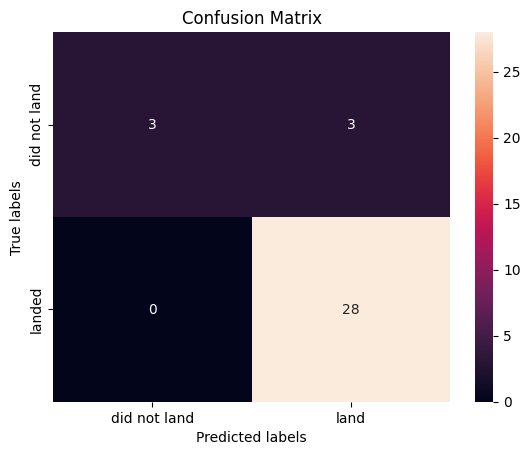

In [30]:
plot_confusion_matrix(Y_test, svm_cv.best_estimator_.predict(X_test))